In [4]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import seaborn as sns
from tqdm import tqdm
matplotlib.rc('pdf', fonttype=42)

In [5]:
p_value_cutoff = 1e-50
min_fc = 1.5

In [6]:
#_ct = 'OPC_NN'
_type = 'Hypo'
known_motifs = glob.glob(f"re_condition_dmr/*/motif_*.{_type}//knownResults.txt")
len(known_motifs)

36

## plot heatmap

In [4]:
motif_pvalue = defaultdict(dict)

for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]

    cell_type =  motif_result.split('/')[-3]
    hyp = motif_result.split("/")[-2].split("_")[-1]
    for motif, row in result_df.iterrows():
        if row['P-value'] < p_value_cutoff:
            motif_pvalue[motif][f'{cell_type}'] = row['P-value']



In [5]:
motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')
motif_pvalue_df = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).fillna(0)
motif_pvalue_df.replace([np.inf, -np.inf], 0, inplace=True)
z_scores_motif_pvalue_df = stats.zscore(motif_pvalue_df, axis = 0)

In [6]:
# motif_pvalue_df = motif_pvalue_df < p_value_cutoff
# use_tfs = z_scores_motif_pvalue_df.sum(axis = 1).sort_values(ascending = False).index[:100]
# f_z_scores_motif_pvalue_df= z_scores_motif_pvalue_df.loc[use_tfs]
# z_scores_motif_pvalue_df.index = z_scores_motif_pvalue_df.index.map(lambda x: x.split('(')[0])

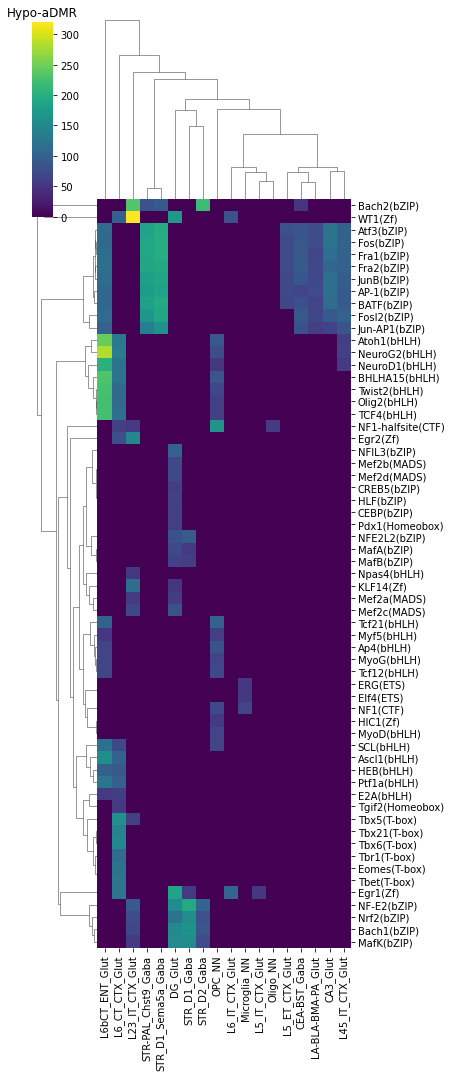

In [8]:
clustermap = sns.clustermap(data=motif_pvalue_df,
                        cmap = 'viridis',
                        figsize=(6,15),
                        #vmin = -np.log(p_value_cutoff),
                        #vmax = 300,
                        rasterized=True,
                        row_cluster=True,
                        col_cluster=True,
                        xticklabels=True,
                        yticklabels=True)
plt.title(f"{_type}-aDMR")

clustermap.savefig(f"figure/{_type}_aDMR.Motif.Heatmap.pdf", dpi=300)
plt.show()

## plot opc hyper

In [7]:
_ct = 'OPC_NN'
#_type = 'Hypo'
known_motifs = glob.glob(f"re_condition_dmr/{_ct}/motif_*/knownResults.txt")
len(known_motifs)

2

In [8]:
motif_pvalue = defaultdict(dict)

for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]

    cell_type =  motif_result.split('/')[-3]
    hyp = motif_result.split("/")[-2]
    
    for motif, row in result_df.iterrows():
        if row['P-value'] < p_value_cutoff:
            motif_pvalue[motif][f'{hyp}'] = -row['Log P-value']

motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')

In [9]:
motif_pvalue_df['Motif'] = motif_pvalue_df.index
motif_pvalue_df = motif_pvalue_df.melt(var_name='Group', id_vars='Motif', value_name='-log pvalue')

In [10]:
motif_pvalue_df['CellType'] = _ct

In [11]:
motif_pvalue_df.replace(0, np.nan, inplace=True)

In [22]:
motif_pvalue_df.head()

,Motif,Group,-log pvalue,CellType
0,NF1-halfsite(CTF),motif_OPC_NN.Hypo,379.2,OPC_NN
1,Tcf21(bHLH),motif_OPC_NN.Hypo,226.0,OPC_NN
2,Atoh1(bHLH),motif_OPC_NN.Hypo,201.9,OPC_NN
3,BHLHA15(bHLH),motif_OPC_NN.Hypo,196.1,OPC_NN
4,Ap4(bHLH),motif_OPC_NN.Hypo,189.2,OPC_NN


/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  from ipykernel import kernelapp as app
/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


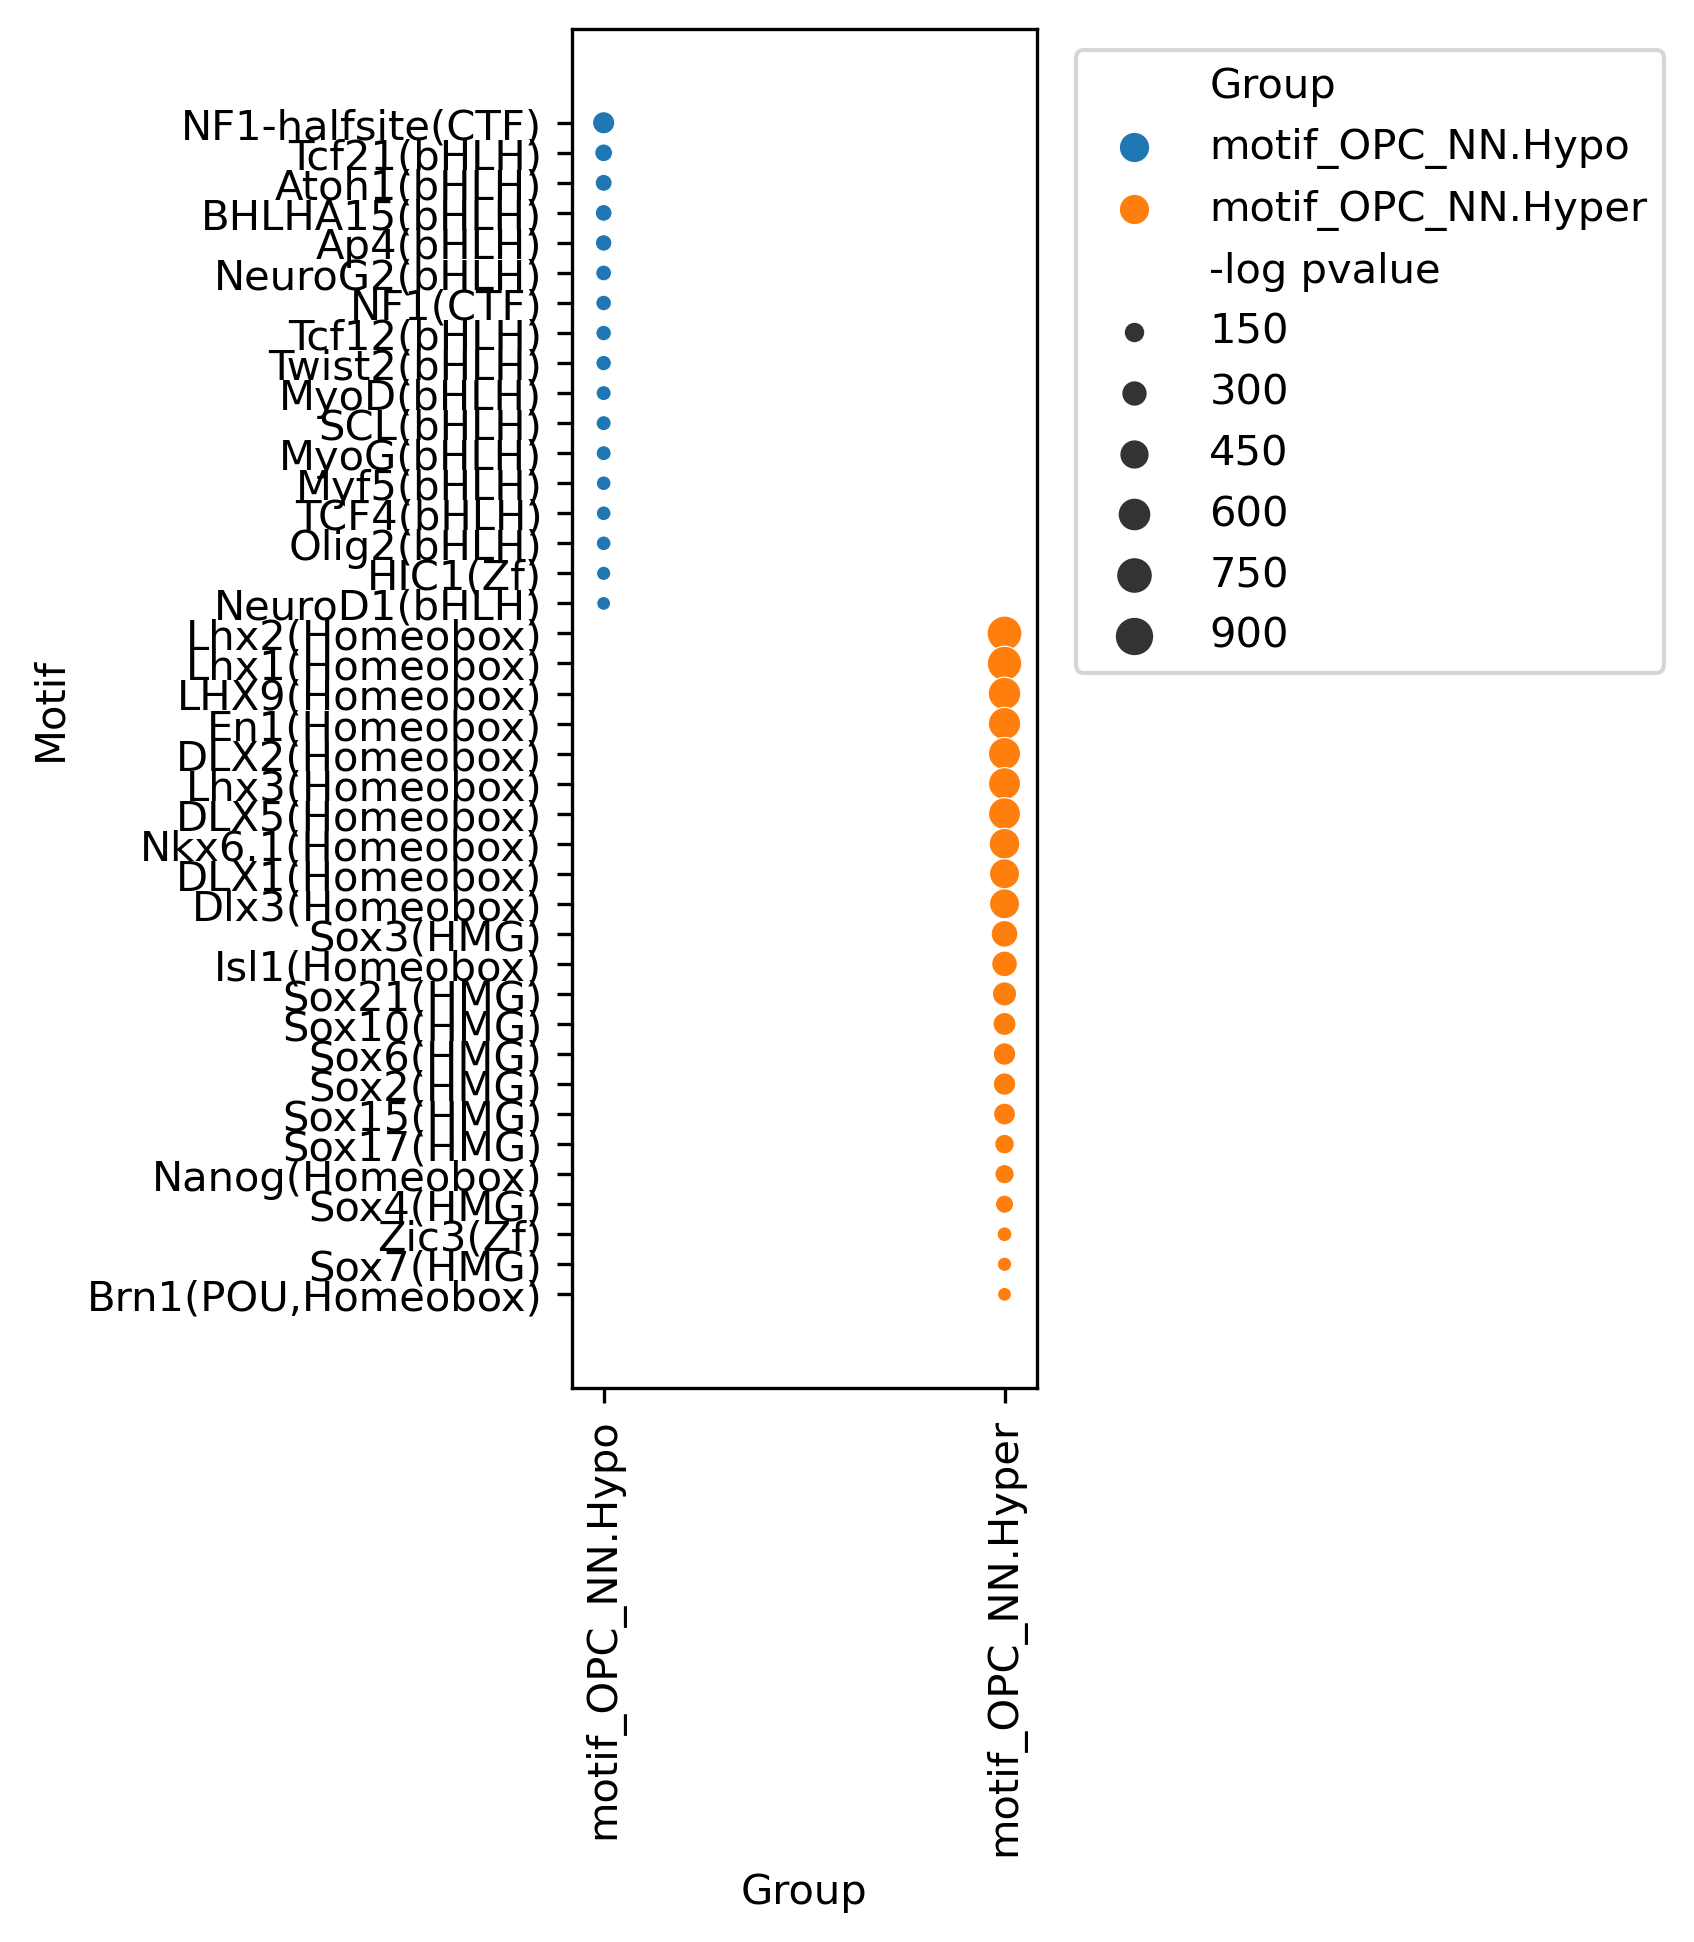

In [26]:
fig, ax = plt.subplots(1,1, figsize=(2,6),dpi = 300, constrained_layout = True)
ax = sns.scatterplot(data=motif_pvalue_df, 
                     x='Group', 
                     y='Motif', 
                     size='-log pvalue', 
                     hue='Group', 
                     ax=ax, 
                     sizes=(10, 70),
                     size_norm = (100,1000),
                    )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=90)
plt.margins(0.08)  # You can adjust this value as per your requirement

fig.savefig(f"figure/OPC_NN.aDMR.Motif.Heatmap.pdf",bbox_inches="tight", dpi=300)
plt.show()